In [1]:
import numpy as np
from numba import cuda
from random import random
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
cuda.select_device(0)

<weakproxy at 0x0000020A825509F0 to Device at 0x0000020A80CC14D0>

In [3]:
threadsperblock = (1, 1)

In [9]:
@cuda.jit
def distsCalc(dists, candX, candY, exisX, exisY):
    _, part = cuda.grid(2)
    #currentX = candX[part]
    #currentY = candY[part]
    for existingPart in range(len(exisX)):
        xDist = min(abs(exisX[existingPart] - candX[part]), 1 - abs(exisX[existingPart] - candX[part]))
        yDist = min(abs(exisY[existingPart] - candY[part]), 1 - abs(exisY[existingPart] - candY[part]))
        dist = xDist**2 + yDist**2
        if dist < dists[part]:
            dists[part] = dist

In [10]:
pointCount = 400

In [11]:
x = np.zeros((pointCount))
y = np.zeros((pointCount))

In [12]:
x[0] = random()
y[0] = random()

In [13]:
for i in trange(1, pointCount):
    candX = np.random.rand(i)
    candY = np.random.rand(i)
    minSqDists = [1]*(i)
    blockspergrid = (1, i)
    distsCalc[blockspergrid, threadsperblock](minSqDists, candX, candY, x, y)
    rightCand = minSqDists.index(max(minSqDists))
    x[i] = candX[rightCand]
    y[i] = candY[rightCand]

  0%|          | 0/399 [00:00<?, ?it/s]c:\Users\maxwa\anaconda3\envs\POT\Lib\site-packages\numba\cuda\dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
  0%|          | 0/399 [00:00<?, ?it/s]


NumbaRuntimeError: Failed in cuda mode pipeline (step: native lowering)
[1m[1mNRT required but not enabled[0m
[0m[1mDuring: lowering "$450binary_subscr.62 = getitem(value=dists, index=part, fn=<built-in function getitem>)" at C:\Users\maxwa\AppData\Local\Temp\ipykernel_36560\2347369858.py (10)[0m

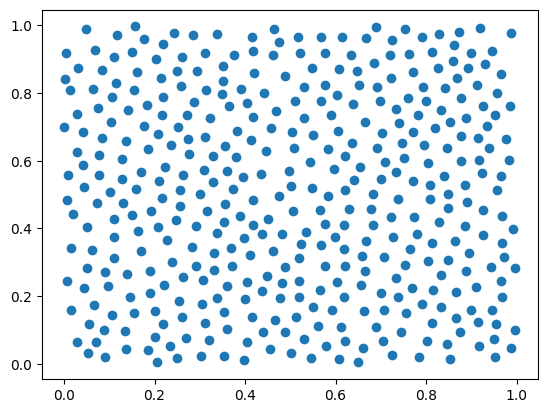

In [77]:
plt.scatter(x, y)